In [1]:
from onetwogo import Params
from onetwogo.parallel_simulation import ParallelSimulation
from onetwogo.experiment_simulation import ExperimentSimulation
from onetwogo.plot import SimulationPlot
from onetwogo.plot import BehavioralPlot
from onetwogo.plot import SortedPlot

import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pickle

%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
from matplotlib import rc

font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}

mpl.rc('font', **font)

jet = cm = plt.get_cmap('jet') 
cNorm  = mpl.colors.Normalize(vmin=0, vmax=1.5)
scalarMap = mpl.cm.ScalarMappable(norm=cNorm, cmap=jet)

In [3]:
sns.set_style("ticks", {'font.family':'sans-serif', 
               'font.sans-serif':['CMU Serif'],
               'size': 11})

In [4]:
PARAMS_DICT = {'Wui': 6,
              'Wuv': 6,
              'Wvi': 6,
              'Wvu': 6,
              'dt': 10,
              'tau': 100,
              'th': 0.65,
              'IF': 50,
              'uinit': 0.7,
              'vinit': 0.2,
              'yinit': 0.5,
               'Iinit': 0.8,
              'first_duration': 750, 
              'sigma': 0.01, 
              'ntrials': 500,
              'delay': 500}

In [5]:
stimulus_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [6]:
range_short = [400, 450, 500, 550, 600, 650, 700]
range_long = [700, 750, 800, 850, 900, 950, 1000]

In [7]:
colors_short = [(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.7972318339100346, 0.20092272202998845, 0.3008073817762399, 1.0),
 (0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0),
 (0.9748558246828143, 0.5574009996155325, 0.32272202998846594, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9966935793925413, 0.8975009611687812, 0.5770857362552863, 1.0),
 (1.0, 0.9803921568627451, 0.5529411764705883, 1.0)]

colors_long = [(1.0, 0.9803921568627451, 0.5529411764705883, 1.0),
 (0.9173394848135333, 0.9669357939254134, 0.6200692041522493, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.5273356401384084, 0.8106113033448674, 0.6452133794694349, 1.0),
 (0.3280276816608997, 0.6805074971164936, 0.6802768166089965, 1.0),
 (0.2265282583621684, 0.4938869665513264, 0.7224913494809688, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

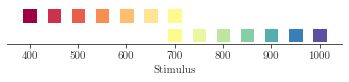

In [16]:
ax = plt.axes()

for stim,c in zip(range_short, colors_short):
    rectangle = plt.Rectangle((stim-15,0), 30, 30, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
for stim,c in zip(range_long, colors_long):
    rectangle = plt.Rectangle((stim-15,-40), 30, 30, fc=c) #,ec="red"
    plt.gca().add_patch(rectangle)
    

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.get_yaxis().set_visible(False)

plt.xlabel('Stimulus')

plt.axis('scaled')
#plt.savefig('../report/figures/trial.pdf', dpi=500, bbox_inches='tight')
plt.savefig('../report/figures/range.svg', dpi=500, bbox_inches='tight')
#plt.savefig('../report/figures/trial.png', dpi=500, bbox_inches='tight')

# Stimulus List

In [20]:
stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

In [21]:
# window 20, 90 %
stimulus_lst_short = np.loadtxt('stimlst_short_400_700_7_a.txt', dtype=int)
stimulus_lst_long = np.loadtxt('stimlst_long_700_1000_7_a.txt', dtype=int)

In [19]:
params = Params(ntrials=500)
expsim = ExperimentSimulation(params)

stimulus_range_s = [400, 450, 500, 550, 600, 650, 700]
stimulus_range_l = [700, 750, 800, 850, 900, 950, 1000]

stimulus_lst_short = expsim.find_stimulus_lst(stimulus_range_s, 20, 0.9)# ,'stimlst_short_400_700_7_a', True)
stimulus_lst_long = expsim.find_stimulus_lst(stimulus_range_l, 20, 0.9) #, 'stimlst_long_700_1000_7_a', True)

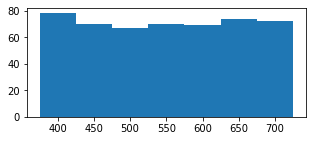

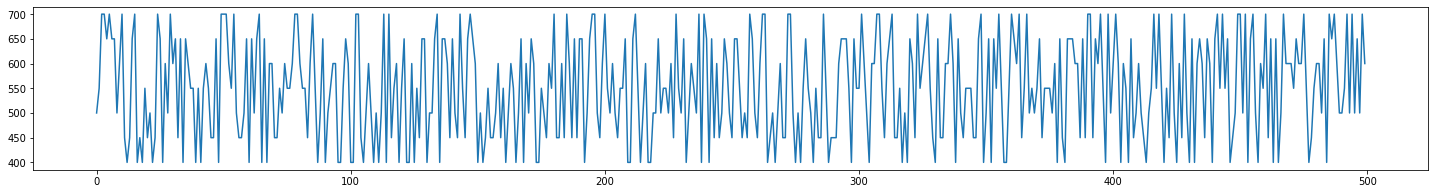

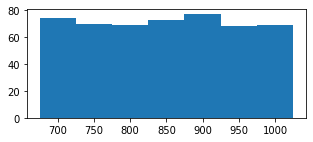

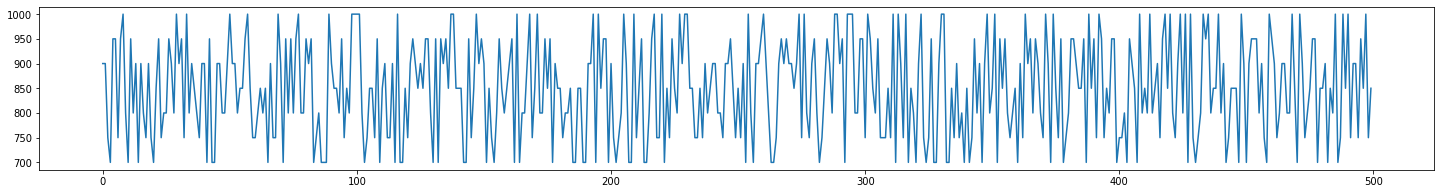

In [15]:
plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_short, bins=7,  range=(stimulus_lst_short.min()-25, stimulus_lst_short.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_short)

plt.figure(figsize=(5, 2))
plt.hist(stimulus_lst_long, bins=7,  range=(stimulus_lst_long.min()-25, stimulus_lst_long.max()+25))
plt.show()
plt.figure(figsize=(25, 3))
plt.plot(stimulus_lst_long)

# Experiment

Timeouts 0


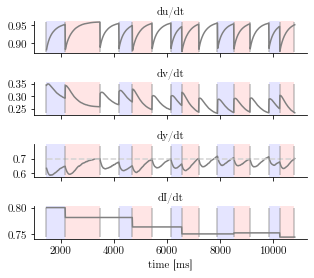

In [56]:
params = Params(ntrials=5, delay=700, tau=140, th=0.7, yinit=0.5)
expsim = ExperimentSimulation(params)

stimulus_lst = [400,500,400,600,400]
#stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
alpha=1
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()
plt.savefig('../report/figures/trial.svg', dpi=500, bbox_inches='tight')

In [48]:
stimulus_lst

[700, 500, 400, 600, 400]

In [49]:
exp_result.production

[70, 62, 53, 52, 53]

Timeouts 0


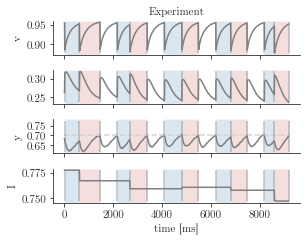

In [15]:
np.random.seed(0)
params = Params(ntrials=5, delay=700, tau=140, th=0.7, yinit=0.6, vinit=0.2)
expsim = ExperimentSimulation(params)

stimulus_lst = [600,600,500,700,600,400]
#stimulus_lst = expsim.generate_stimulus_lst(stimulus_range)
#stimulus_lst = [1000,400, 800, 400]

K = 5.0
alpha=1
exp_result = expsim.simulate(stimulus_lst, K)
plot = exp_result.create_simulation_plot()
plot.plot_trials(alpha)
plot.plot_measurement_production_frames()
plt.savefig('../report/figures/trial_smaller.svg', dpi=500, bbox_inches='tight')

In [98]:
exp_result.production

[114, 82, 69, 66, 65, 57]